Initial Setup and Data loading

In [1]:
# Initial Setup and Data Loading
#-----------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Data Loading and Initial Processing

In [2]:
# DATA LOADING AND INITIAL PROCESSING
#----------------------------------------
# Load dataset
df = pd.read_excel('/cattle_dataset.xlsx')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
df.info()

Dataset Shape: (178, 14)

First few rows:
   body_temperature    breed_type  milk_production  respiratory_rate  \
0              38.2   Cross Breed             13.6                36   
1              38.9  Normal Breed             24.1                37   
2              38.6   Cross Breed             14.7                42   
3              39.5  Normal Breed             26.2                29   
4              39.7  Normal Breed             22.5                48   

   walking_capacity  sleeping_duration  body_condition_score  heart_rate  \
0             12432                3.5                     3          50   
1             11987                4.2                     2          62   
2             13121                3.2                     3          71   
3             12055                3.8                     4          68   
4             10352                4.6                     2          63   

   eating_duration  lying_down_duration  ruminating  rumen_fill  \
0

Basic Data Analysis

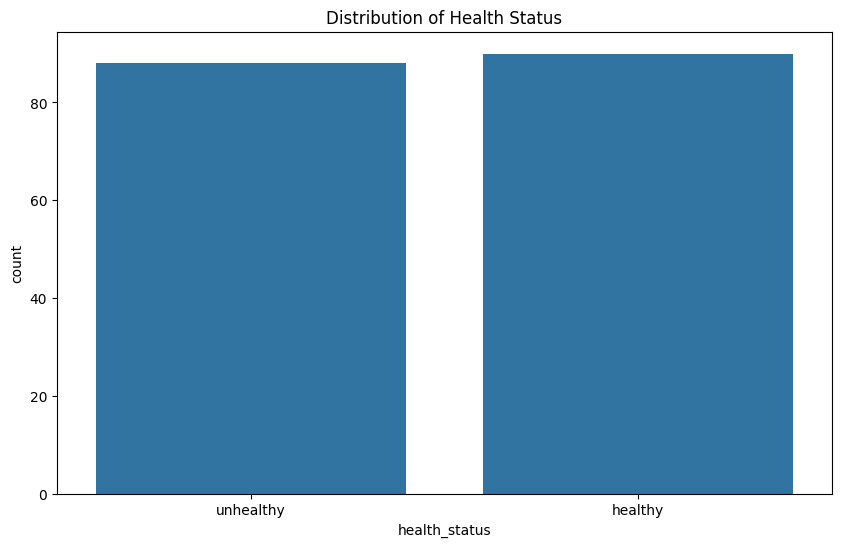

In [3]:
# Basic Data Analysis
#------------------------------
# Health status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='health_status')
plt.title('Distribution of Health Status')
plt.show()

Breed Type Distribution

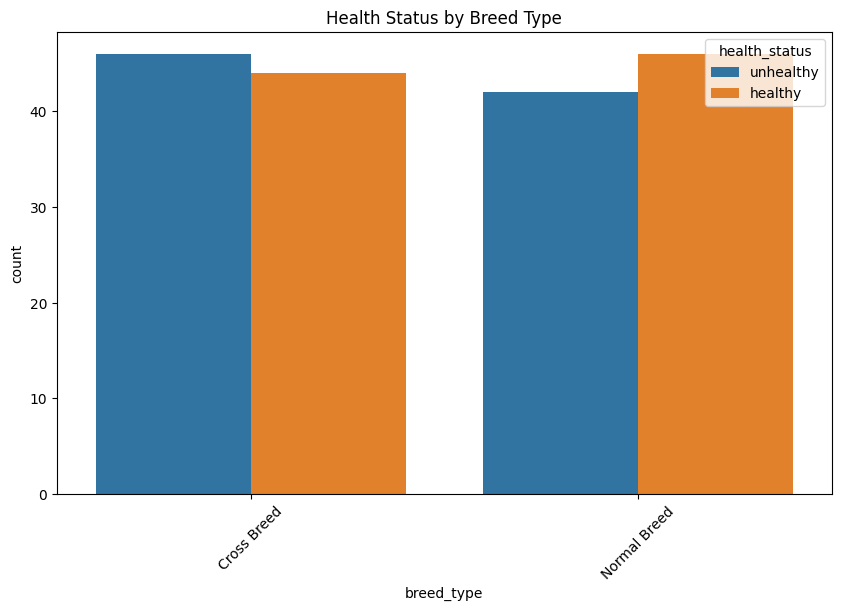

In [5]:
# Breed type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='breed_type', hue='health_status')
plt.title('Health Status by Breed Type')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Basic statistics for numerical columns
print("\nNumerical Features Statistics:")
print(df.describe())


Numerical Features Statistics:
       body_temperature  milk_production  respiratory_rate  walking_capacity  \
count        178.000000       178.000000        178.000000        178.000000   
mean          39.011236        14.770787         28.685393       9303.179775   
std            0.872225         6.615735          9.768617       3237.390592   
min           35.500000         5.100000         14.000000       5004.000000   
25%           38.300000         9.700000         21.000000       6019.000000   
50%           38.900000        13.600000         28.000000      11203.000000   
75%           39.700000        21.200000         36.000000      12291.000000   
max           40.600000        26.500000         49.000000      13257.000000   

       sleeping_duration  body_condition_score  heart_rate  eating_duration  \
count         178.000000            178.000000  178.000000       178.000000   
mean            4.934831              2.910112   53.955056         2.825843   
std       

Vital sign Analysis

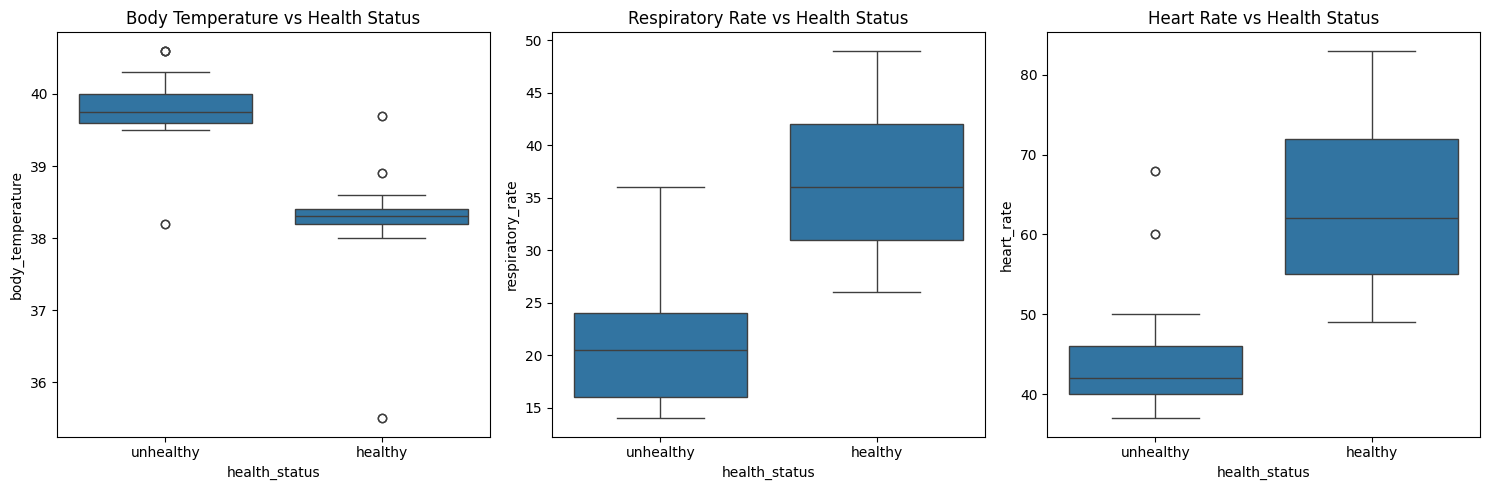

In [7]:
# Vital Signs Analysis
#-------------------------------
# Vital signs boxplots
vital_signs = ['body_temperature', 'respiratory_rate', 'heart_rate']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(vital_signs):
    sns.boxplot(x='health_status', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Health Status')
plt.tight_layout()
plt.show()

In [8]:
# Statistics by health status
print("\nVital Signs Statistics by Health Status:")
for col in vital_signs:
    print(f"\n{col} Statistics:")
    print(df.groupby('health_status')[col].describe())


Vital Signs Statistics by Health Status:

body_temperature Statistics:
               count       mean       std   min   25%    50%   75%   max
health_status                                                           
healthy         90.0  38.268889  0.504729  35.5  38.2  38.30  38.4  39.7
unhealthy       88.0  39.770455  0.366141  38.2  39.6  39.75  40.0  40.6

respiratory_rate Statistics:
               count       mean       std   min   25%   50%   75%   max
health_status                                                          
healthy         90.0  36.288889  6.881410  26.0  31.0  36.0  42.0  49.0
unhealthy       88.0  20.909091  4.972652  14.0  16.0  20.5  24.0  36.0

heart_rate Statistics:
               count       mean        std   min   25%   50%   75%   max
health_status                                                           
healthy         90.0  64.133333  10.090824  49.0  55.0  62.0  72.0  83.0
unhealthy       88.0  43.545455   5.593323  37.0  40.0  42.0  46.0  68.0


Behavioural Analysis

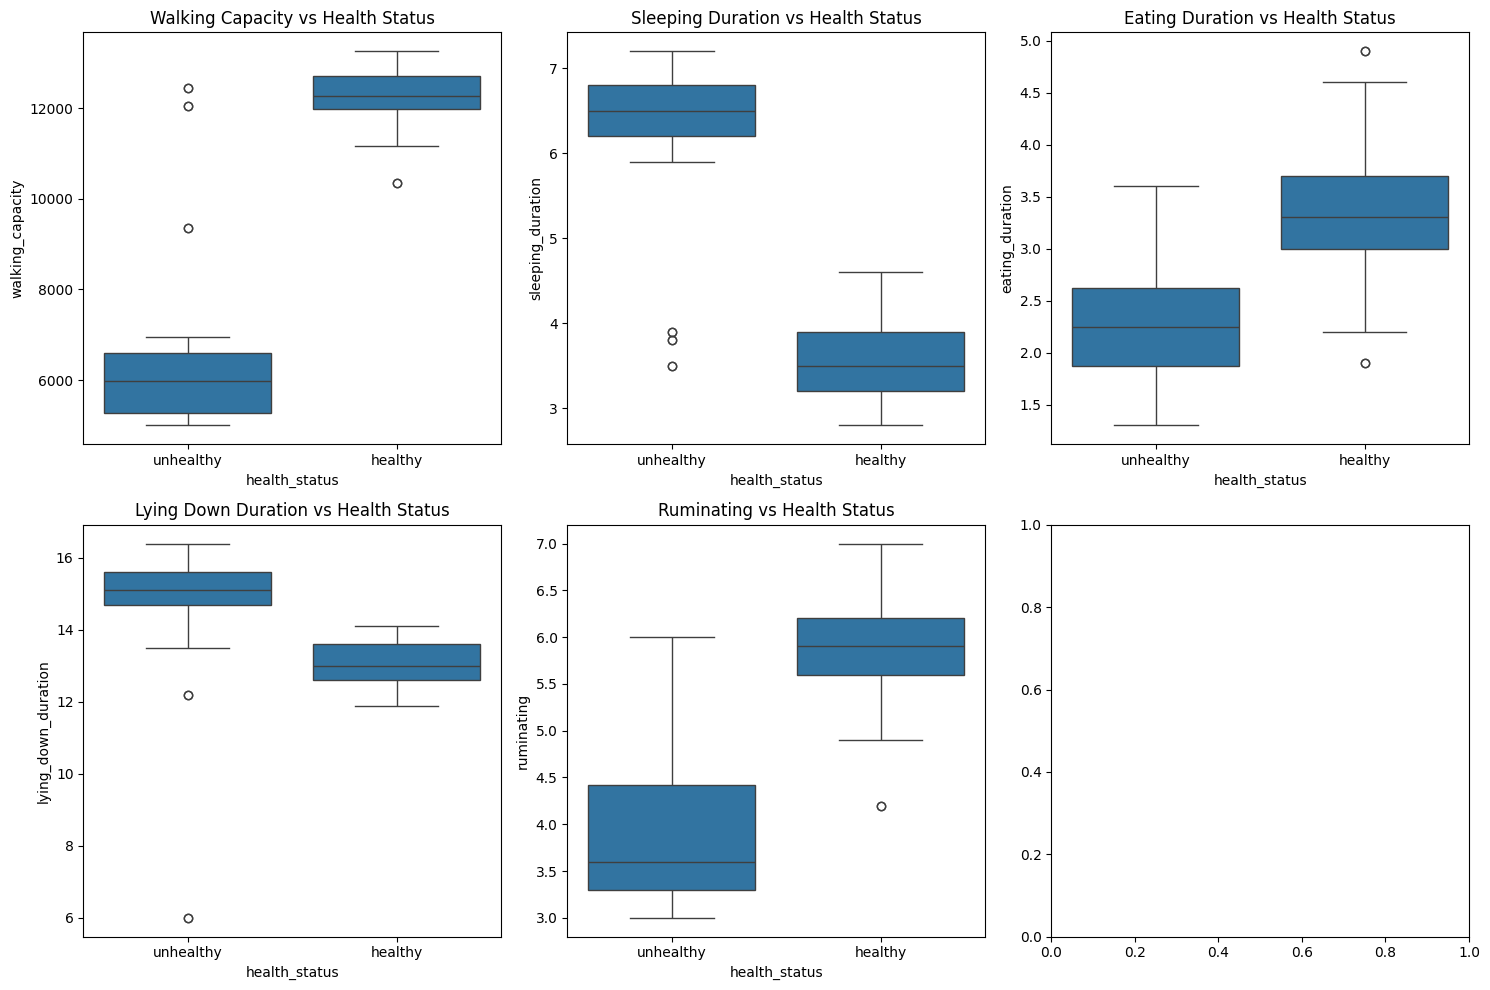

In [9]:
# Behavioral Analysis
#------------------------------
behavioral = ['walking_capacity', 'sleeping_duration', 'eating_duration',
             'lying_down_duration', 'ruminating']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(behavioral):
    if i < len(axes):
        sns.boxplot(x='health_status', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col.replace("_", " ").title()} vs Health Status')
plt.tight_layout()
plt.show()

In [10]:
print("\nBehavioral Patterns Statistics:")
for col in behavioral:
    print(f"\n{col} Statistics by Health Status:")
    print(df.groupby('health_status')[col].describe())


Behavioral Patterns Statistics:

walking_capacity Statistics by Health Status:
               count          mean          std      min      25%      50%  \
health_status                                                                
healthy         90.0  12285.666667   576.542854  10352.0  11987.0  12255.0   
unhealthy       88.0   6252.909091  1539.383125   5004.0   5281.0   5977.0   

                    75%      max  
health_status                     
healthy        12697.00  13257.0  
unhealthy       6601.75  12432.0  

sleeping_duration Statistics by Health Status:
               count      mean       std  min  25%  50%  75%  max
health_status                                                    
healthy         90.0  3.528889  0.418999  2.8  3.2  3.5  3.9  4.6
unhealthy       88.0  6.372727  0.795783  3.5  6.2  6.5  6.8  7.2

eating_duration Statistics by Health Status:
               count      mean       std  min    25%   50%    75%  max
health_status                         

Feature Engineering

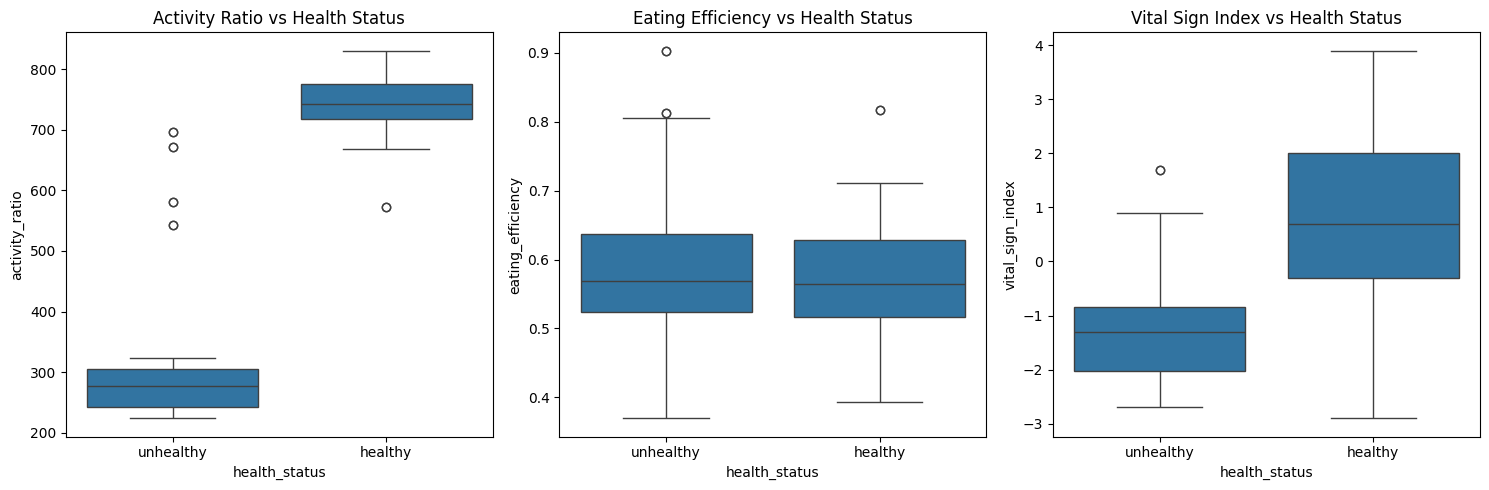

In [11]:
#------------------------------
# Create new features
df['activity_ratio'] = df['walking_capacity'] / (df['sleeping_duration'] + df['lying_down_duration'])
df['eating_efficiency'] = df['eating_duration'] / df['ruminating']
df['vital_sign_index'] = (df['body_temperature'] - 38.5) + (df['respiratory_rate'] - 30)/10 + (df['heart_rate'] - 60)/10

# Encode categorical variables
le = LabelEncoder()
df['breed_type_encoded'] = le.fit_transform(df['breed_type'])
df['faecal_consistency_encoded'] = le.fit_transform(df['faecal_consistency'])
df['health_status_encoded'] = le.fit_transform(df['health_status'])

# Plot engineered features
engineered_features = ['activity_ratio', 'eating_efficiency', 'vital_sign_index']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(engineered_features):
    sns.boxplot(x='health_status', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Health Status')
plt.tight_layout()
plt.show()

In [12]:
print("\nEngineered Features Statistics:")
for col in engineered_features:
    print(f"\n{col} Statistics:")
    print(df[col].describe())


Engineered Features Statistics:

activity_ratio Statistics:
count    178.000000
mean     524.749448
std      236.276094
min      223.928571
25%      277.373272
50%      670.838323
75%      742.134146
max      830.443038
Name: activity_ratio, dtype: float64

eating_efficiency Statistics:
count    178.000000
mean       0.581119
std        0.094852
min        0.369565
25%        0.522388
50%        0.567568
75%        0.634921
max        0.903226
Name: eating_efficiency, dtype: float64

vital_sign_index Statistics:
count    178.000000
mean      -0.224719
std        1.650289
min       -2.900000
25%       -1.400000
50%       -0.700000
75%        0.900000
max        3.900000
Name: vital_sign_index, dtype: float64


Model Development

In [13]:
# Model Development
#----------------------------
# Prepare features
features = ['body_temperature', 'breed_type_encoded', 'milk_production',
           'respiratory_rate', 'walking_capacity', 'sleeping_duration',
           'body_condition_score', 'heart_rate', 'eating_duration',
           'lying_down_duration', 'ruminating', 'rumen_fill',
           'faecal_consistency_encoded', 'activity_ratio',
           'eating_efficiency', 'vital_sign_index']

X = df[features]
y = df['health_status_encoded']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print results
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



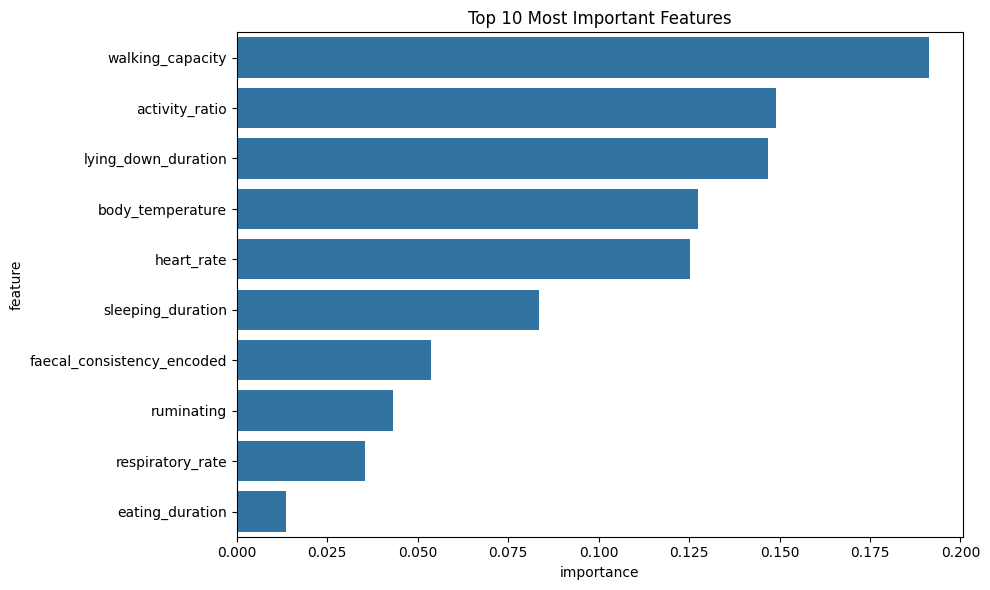

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

Real-time Monitoring Simulation

In [15]:
# Real-time Monitoring Simulation
#-----------------------------------------
def generate_reading():
    return {
        'body_temperature': np.random.uniform(37.5, 39.5),
        'respiratory_rate': np.random.randint(20, 40),
        'heart_rate': np.random.randint(40, 80),
        'walking_capacity': np.random.randint(5000, 13000),
        'sleeping_duration': np.random.uniform(3, 7),
        'eating_duration': np.random.uniform(2, 4),
        'lying_down_duration': np.random.uniform(12, 16),
        'ruminating': np.random.uniform(3, 7)
    }

# Generate sample readings
readings = [generate_reading() for _ in range(5)]
simulated_df = pd.DataFrame(readings)

print("Simulated Sensor Readings:")
print(simulated_df)

Simulated Sensor Readings:
   body_temperature  respiratory_rate  heart_rate  walking_capacity  \
0         38.891195                20          43              6090   
1         38.657815                25          54             11503   
2         38.947319                34          78              6205   
3         37.943143                21          70              5311   
4         38.495281                26          54              9460   

   sleeping_duration  eating_duration  lying_down_duration  ruminating  
0           4.245532         3.242262            12.984478    4.743530  
1           3.856156         3.526722            14.330591    5.541648  
2           6.862111         3.881147            14.086533    4.171768  
3           3.880186         3.166045            13.532759    3.564563  
4           5.510210         2.389994            13.296419    6.836501  


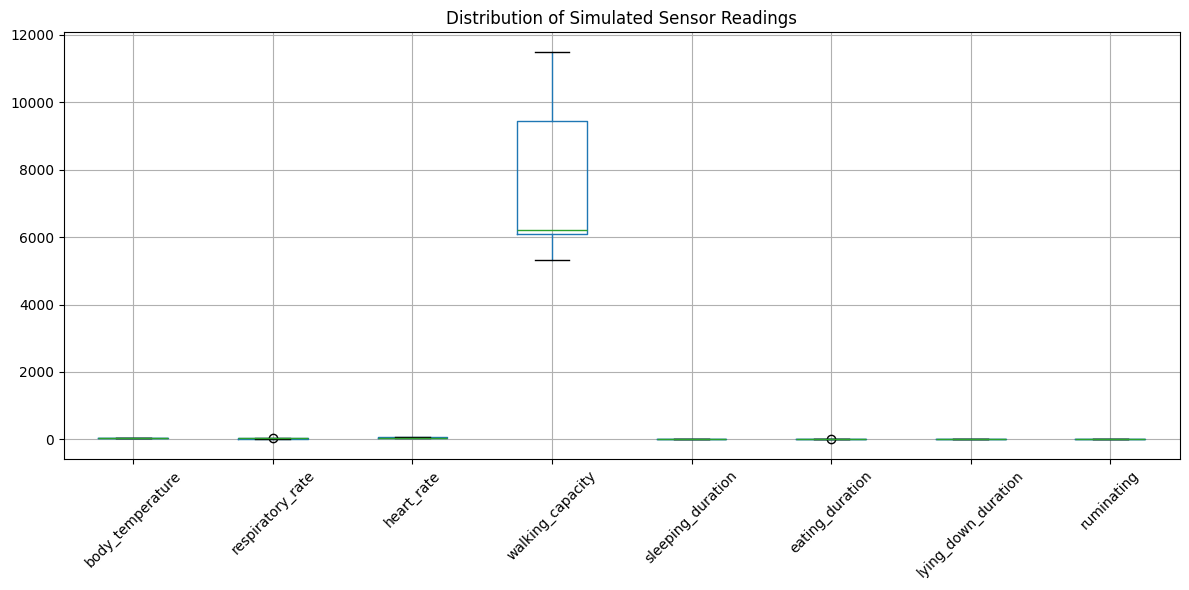

In [16]:
# Visualize simulated readings
plt.figure(figsize=(12, 6))
simulated_df.boxplot()
plt.title('Distribution of Simulated Sensor Readings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Understanding Predictions

In [17]:
# Understanding Predictions
#-----------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle  # If you want to save the model

# 2. Create a function to make predictions
def predict_cow_health(data_point, model, scaler, feature_names):
    """
    Make prediction for a single cow's health status
    """
    # Reshape data for single prediction
    data_point_df = pd.DataFrame([data_point], columns=feature_names)

    # Scale the features
    data_point_scaled = scaler.transform(data_point_df)

    # Make prediction
    prediction = model.predict(data_point_scaled)
    probability = model.predict_proba(data_point_scaled)

    return prediction[0], probability[0]
# 3. Test with some example cases
# Example 1: Healthy cow parameters
healthy_cow = {
    'body_temperature': 38.5,        # Normal temperature
    'breed_type_encoded': 1,         # Normal Breed
    'milk_production': 24.0,         # Good milk production
    'respiratory_rate': 30,          # Normal respiratory rate
    'walking_capacity': 12000,       # Good walking capacity
    'sleeping_duration': 4.0,        # Normal sleeping duration
    'body_condition_score': 3,       # Good body condition
    'heart_rate': 60,               # Normal heart rate
    'eating_duration': 3.5,         # Normal eating duration
    'lying_down_duration': 13.0,    # Normal lying duration
    'ruminating': 5.5,              # Normal ruminating
    'rumen_fill': 3,                # Normal rumen fill
    'faecal_consistency_encoded': 1, # Normal consistency
    'activity_ratio': 705.88,       # Calculated from walking/(sleeping+lying)
    'eating_efficiency': 0.636,     # Calculated from eating/ruminating
    'vital_sign_index': 0.0         # Normal vital signs
}
# Example 2: Potentially unhealthy cow
unhealthy_cow = {
    'body_temperature': 39.8,        # High temperature
    'breed_type_encoded': 1,         # Normal Breed
    'milk_production': 8.0,          # Low milk production
    'respiratory_rate': 45,          # High respiratory rate
    'walking_capacity': 6000,        # Low walking capacity
    'sleeping_duration': 6.5,        # High sleeping duration
    'body_condition_score': 1,       # Poor body condition
    'heart_rate': 75,               # High heart rate
    'eating_duration': 2.0,         # Low eating duration
    'lying_down_duration': 16.0,    # High lying duration
    'ruminating': 3.5,              # Low ruminating
    'rumen_fill': 1,                # Low rumen fill
    'faecal_consistency_encoded': 2, # Abnormal consistency
    'activity_ratio': 267.86,       # Low activity ratio
    'eating_efficiency': 0.571,     # Low eating efficiency
    'vital_sign_index': 2.5         # High vital sign index
}
# Make predictions
print("Prediction for Healthy Cow Parameters:")
pred_healthy, prob_healthy = predict_cow_health(healthy_cow, rf_model, scaler, features)
print(f"Prediction: {'Healthy' if pred_healthy == 0 else 'Unhealthy'}")
print(f"Probability: Healthy={prob_healthy[0]:.2%}, Unhealthy={prob_healthy[1]:.2%}")

print("\nPrediction for Unhealthy Cow Parameters:")
pred_unhealthy, prob_unhealthy = predict_cow_health(unhealthy_cow, rf_model, scaler, features)
print(f"Prediction: {'Healthy' if pred_unhealthy == 0 else 'Unhealthy'}")
print(f"Probability: Healthy={prob_unhealthy[0]:.2%}, Unhealthy={prob_unhealthy[1]:.2%}")

# 4. Create a function to simulate real-time monitoring
def monitor_cow_health(sensor_readings, model, scaler, feature_names):
    """
    Monitor cow health with real-time sensor readings
    """
    prediction, probabilities = predict_cow_health(sensor_readings, model, scaler, feature_names)

    # Define risk levels
    risk_level = "Low" if probabilities[1] < 0.3 else "Medium" if probabilities[1] < 0.7 else "High"
     # Generate alerts based on specific parameters
    alerts = []
    if sensor_readings['body_temperature'] > 39.5:
        alerts.append("High body temperature detected!")
    if sensor_readings['respiratory_rate'] > 40:
        alerts.append("High respiratory rate detected!")
    if sensor_readings['heart_rate'] > 70:
        alerts.append("High heart rate detected!")
    if sensor_readings['milk_production'] < 10:
        alerts.append("Low milk production detected!")

    return {
        'prediction': 'Healthy' if prediction == 0 else 'Unhealthy',
        'confidence': max(probabilities),
        'risk_level': risk_level,
        'alerts': alerts
    }
# 5. Test real-time monitoring
print("\nSimulating Real-time Monitoring:")
monitoring_result = monitor_cow_health(unhealthy_cow, rf_model, scaler, features)
print("\nMonitoring Results:")
print(f"Health Status: {monitoring_result['prediction']}")
print(f"Confidence: {monitoring_result['confidence']:.2%}")
print(f"Risk Level: {monitoring_result['risk_level']}")
if monitoring_result['alerts']:
    print("\nAlerts:")
    for alert in monitoring_result['alerts']:
        print(f"- {alert}")

Prediction for Healthy Cow Parameters:
Prediction: Healthy
Probability: Healthy=57.00%, Unhealthy=43.00%

Prediction for Unhealthy Cow Parameters:
Prediction: Unhealthy
Probability: Healthy=12.00%, Unhealthy=88.00%

Simulating Real-time Monitoring:

Monitoring Results:
Health Status: Unhealthy
Confidence: 88.00%
Risk Level: High

Alerts:
- High body temperature detected!
- High respiratory rate detected!
- High heart rate detected!
- Low milk production detected!
